# Aprendizaje de redes neuronales para reconocimiento de señales de transito

In [85]:
import tensorflow as tf
import os
import skimage.io as imd
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import transform
from skimage.color import rgb2gray
main_dir = "./BelgiumTS/"
training_dir = os.path.join(main_dir, "Training/")
test_dir = os.path.join(main_dir, "Testing/")

In [65]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

In [57]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
            
    return images, labels

In [58]:
images, labels = load_ml_data(training_dir)

# Histograma de frecuencia de los labels

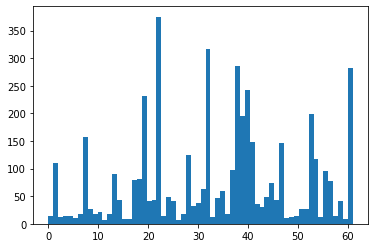

In [59]:
plt.hist(labels, len(set(labels)))
plt.show()

# Resumen visual de imagenes 

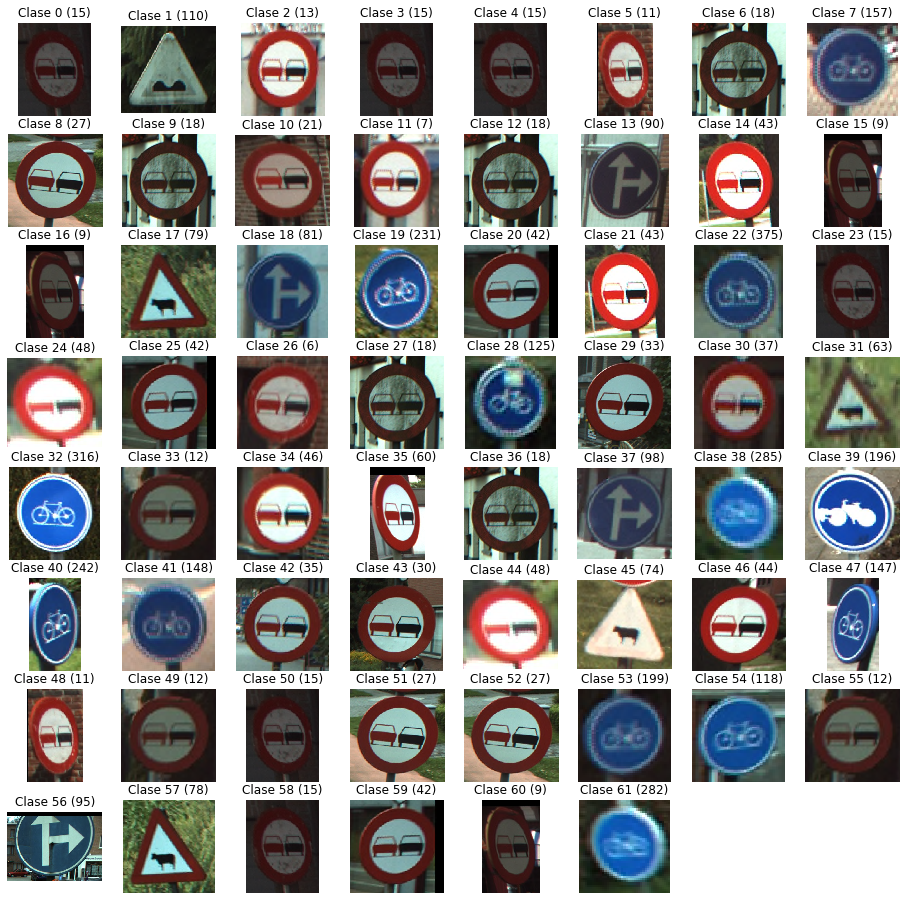

In [60]:
unique_labels = set(labels)
plt.figure(figsize = (16,16))
i=1
for label in unique_labels:
    temp_img = images[list(labels).count(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i+=1
    plt.imshow(temp_img)
plt.show()

# Modelo de Red neuronal
* Las imagenes no son todas del mismo tamaño
* Hay 62 clases, de la 0 a la 61
* La distribución de imágenes no son uniformes, algunas salen más veces que otras

In [198]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [199]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

In [200]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

In [201]:
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

In [202]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

In [203]:
train_opt = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

In [204]:
final_pred = tf.argmax(logits, 1)

In [205]:
accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

# Entrenamiento del modelo

In [206]:
tf.set_random_seed(12345)

In [273]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(6000):
    _, accuracy_val = sess.run([train_opt, accuracy], feed_dict = {
        x: images30,
        y: list(labels)
    })
    
    #_, loss_val = sess.run([train_opt, loss], feed_dict = {
    #    x: images30,
    #    y: list(labels)
    #})
    
    
    if i%50 == 0:
        print("EPOCH", i)
        print ("Eficacia", accuracy_val)
        #print ("Perdidas", loss_val)

EPOCH 0
Eficacia 30.180109
EPOCH 50
Eficacia 35.474316
EPOCH 100
Eficacia 35.01202
EPOCH 150
Eficacia 34.697487
EPOCH 200
Eficacia 34.599125
EPOCH 250
Eficacia 34.557816
EPOCH 300
Eficacia 34.508198
EPOCH 350
Eficacia 34.408524
EPOCH 400
Eficacia 34.348198
EPOCH 450
Eficacia 34.340767
EPOCH 500
Eficacia 34.348198
EPOCH 550
Eficacia 34.360218
EPOCH 600
Eficacia 34.328304
EPOCH 650
Eficacia 34.3541
EPOCH 700
Eficacia 34.385357
EPOCH 750
Eficacia 34.40459
EPOCH 800
Eficacia 34.409836
EPOCH 850
Eficacia 34.399563
EPOCH 900
Eficacia 34.415302
EPOCH 950
Eficacia 34.426884
EPOCH 1000
Eficacia 34.446556
EPOCH 1050
Eficacia 34.398033
EPOCH 1100
Eficacia 34.373333
EPOCH 1150
Eficacia 34.372677
EPOCH 1200
Eficacia 34.3635
EPOCH 1250
Eficacia 34.34426
EPOCH 1300
Eficacia 34.30011
EPOCH 1350
Eficacia 34.300545
EPOCH 1400
Eficacia 34.295082
EPOCH 1450
Eficacia 34.247868
EPOCH 1500
Eficacia 34.24809
EPOCH 1550
Eficacia 34.220764
EPOCH 1600
Eficacia 34.224262
EPOCH 1650
Eficacia 34.206776
EPOCH 1700
E

# Evaluación de la red neuronal

In [274]:
sample_idx = random.sample(range(len(images30)), 100)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [275]:
prediction = sess.run([final_pred], feed_dict={x: sample_images})[0]

In [276]:
match_count = sum([int(y == y_) for y, y_ in zip(sample_labels, prediction)])
match_count

77

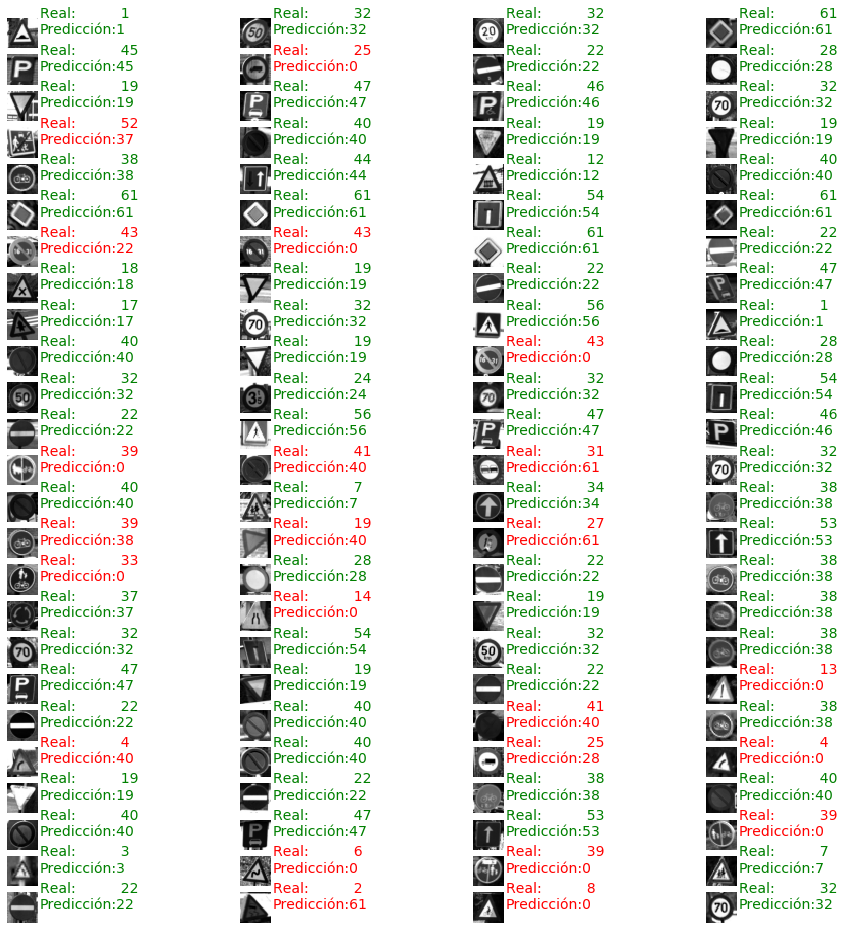

In [277]:
plt.figure(figsize = (16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(30,4,i+1)
    plt.axis("off")
    color = "green" if truth == predi else "red"
    plt.text(32,15, "Real:          {0}\nPredicción:{1}".format(truth, predi),
             fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")
plt.show()

# Pruebas con Dataset

In [303]:
test_images, test_labels = load_ml_data(test_dir)

In [304]:
test_images30 = [transform.resize(im, (30, 30)) for im in test_images]

In [305]:
test_images30 = rgb2gray(np.array(test_images30))

In [312]:
test_sample_idx = random.sample(range(len(test_images30)), 100)
test_sample_images = [test_images30[i] for i in test_sample_idx]
test_sample_labels = [test_labels[i] for i in test_sample_idx]

In [313]:
test_prediction = sess.run([final_pred], feed_dict={x: test_sample_images})[0]

TypeError: unhashable type: 'list'

* Datos en la muestra

In [308]:
match_count = sum([int(y == y_) for y, y_ in zip(test_sample_labels, test_prediction)])
match_count

65

In [309]:
acc = match_count/len(test_sample_labels)*100

In [310]:
print("Eficacia de la red neuronal: {:.3f}".format(acc))

Eficacia de la red neuronal: 65.000


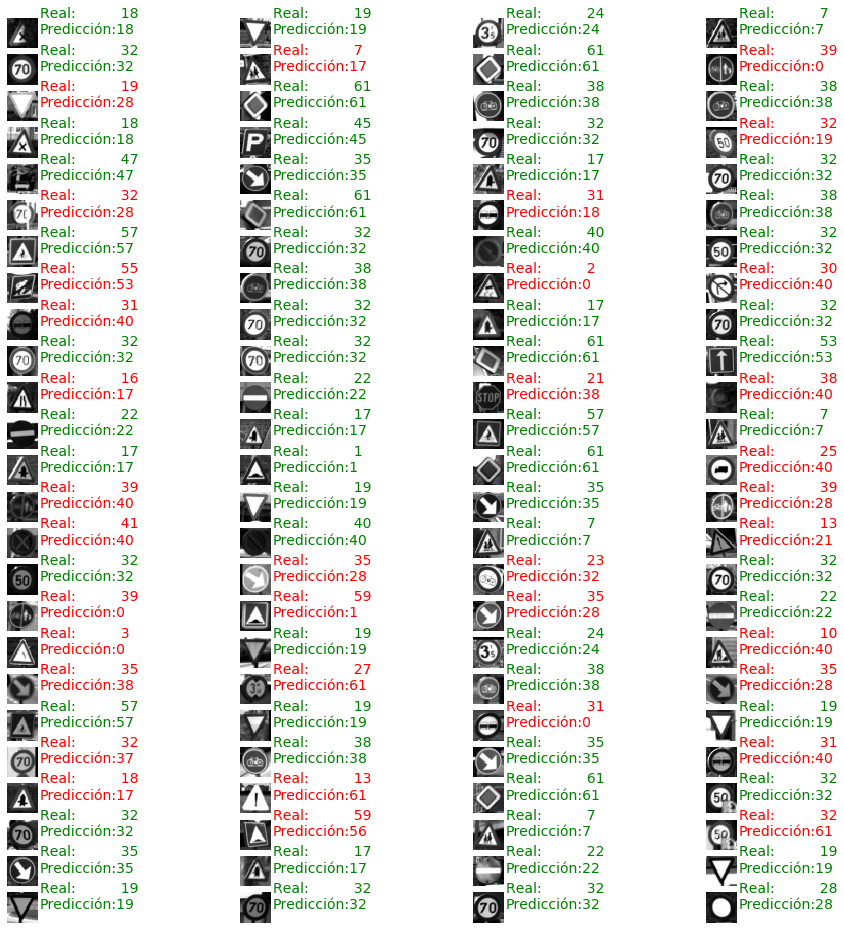

In [311]:
plt.figure(figsize = (16,20))
for i in range(len(test_sample_images)):
    truth = test_sample_labels[i]
    predi = test_prediction[i]
    plt.subplot(30,4,i+1)
    plt.axis("off")
    color = "green" if truth == predi else "red"
    plt.text(32,15, "Real:          {0}\nPredicción:{1}".format(truth, predi),
             fontsize = 14, color = color)
    plt.imshow(test_sample_images[i], cmap = "gray")
plt.show()